# Predicting Customer Churn

* insert explanation on the usecase*

# LOGISTIC REGRESSION

*inserte explanation of logistic regression and functions used*

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Additional Libraries

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">**MinMaxScaler**</a>: *Transforms features by scaling each feature to a given range.This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.*

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.preprocessing import MinMaxScaler

## Load and Explore the Dataset

Telecom Churn Dataset

In [4]:
#Provide the path of the dataset
df = pd.read_csv("Churn_Cleaned.csv", index_col=0)

In [5]:
#Check the dataset
df.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_WA,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes,Churn_True.
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [6]:
#Check the min, max, and mean values to determine if features are on the same scale
df.describe()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_WA,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes,Churn_True.
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,...,0.019802,0.023402,0.031803,0.023102,0.251425,0.496550,0.252025,0.096910,0.276628,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,...,0.139340,0.151200,0.175502,0.150251,0.433897,0.500063,0.434241,0.295879,0.447398,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Check the number of observations and features
df.shape

(3333, 72)

In [8]:
#Identify and check the value counts of the target variable
df['Churn_True.'].value_counts()

0.0    2850
1.0     483
Name: Churn_True., dtype: int64

## Build the Model

In [9]:
#Separate the Features and the Target Variable
X = df.drop(["Churn_True."], axis=1)
y = df["Churn_True."]

In [10]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
#Check shape to make sure it is all in order
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2499, 71), (834, 71), (2499L,), (834L,))

### Scaling the Dataset

Scale the features using the MinMaxScaler

In [ ]:
#Models - should know so that the train set wouldn't know (WHY IT MUST ONLY BE ON THE TRAINING SET NOT ON THE TEST SET)
#MODELS - doesn't know it yet or the information, to limit bias.

In [12]:
#Instantiate the MinMax Scaler
minmax = MinMaxScaler()

#Fit the scaler to the training set
#Because it it is still not used by the system
minmax.fit(X_train)

#Transform the training set
X_train_scaled = minmax.transform(X_train)

#Transform the test set
X_test_scaled = minmax.transform(X_test)

In [13]:
#View the scaled data
X_train_scaled

array([[0.67768595, 0.        , 0.5877551 , ..., 1.        , 0.        ,
        0.        ],
       [0.25206612, 0.64705882, 0.52069971, ..., 1.        , 0.        ,
        1.        ],
       [0.37603306, 0.        , 0.56588921, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26033058, 0.        , 0.57842566, ..., 0.        , 0.        ,
        0.        ],
       [0.65289256, 0.        , 0.23294461, ..., 0.        , 0.        ,
        0.        ],
       [0.18181818, 0.        , 0.58250729, ..., 0.        , 0.        ,
        0.        ]])

In [14]:
#View the type of the scaled data
type(X_train_scaled)

numpy.ndarray

In [15]:
#Change to Pandas dataframe for easier viewing and manipulation of the data (tranformation of the data)
X_train_sdf = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns) #Pass all values, starts with index and whee to get the columns
X_test_sdf = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns) 

In [16]:
#Check the min, max, and mean values to determine if features are on the same scale
X_train_sdf.describe()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_VT,State_WA,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,...,2499.000000,2499.000000,2499.00000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
mean,0.413820,0.153771,0.502612,0.520451,0.502552,0.554619,0.588593,0.554705,0.476239,0.520087,...,0.022409,0.021208,0.02401,0.031212,0.025610,0.250900,0.495398,0.253701,0.094838,0.268908
std,0.167114,0.265572,0.159891,0.147349,0.159891,0.140013,0.117771,0.140031,0.135116,0.159653,...,0.148039,0.144108,0.15311,0.173926,0.158001,0.433618,0.500079,0.435216,0.293050,0.443481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.297521,0.000000,0.396939,0.422222,0.396844,0.459720,0.511765,0.459722,0.386767,0.409836,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.413223,0.000000,0.500583,0.525926,0.500600,0.557053,0.588235,0.557101,0.476600,0.524590,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.520661,0.352941,0.609184,0.622222,0.609158,0.649711,0.664706,0.649951,0.568854,0.631148,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#View the dataset
X_train_sdf.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_VT,State_WA,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes
2907,0.677686,0.000000,0.587755,0.274074,0.587721,0.752818,0.523529,0.752831,0.341581,0.426230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1254,0.252066,0.647059,0.520700,0.400000,0.520665,0.552653,0.800000,0.552896,0.708714,0.549180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
576,0.376033,0.000000,0.565889,0.325926,0.565769,0.623591,0.700000,0.623746,0.522593,0.360656,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1024,0.599174,0.000000,0.365015,0.259259,0.364946,0.722574,0.547059,0.722743,0.513986,0.754098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2064,0.272727,0.000000,0.382216,0.259259,0.382096,0.574374,0.641176,0.574571,0.562668,0.377049,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Train the Model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">**Logistic Regression**</a>

C = Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.

In [18]:
#Instantiate the Algorithm 
#giving more weight to lesser observations, 
logreg = LogisticRegression(C=1e9, class_weight="balanced", solver='liblinear', random_state=25)

#Train/Fit the model
logreg.fit(X_train_sdf, y_train)

LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=25,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [19]:
#Check the Trained Model Coefficients
print(logreg.coef_)

[[ 9.45031393e-02  2.50099740e+00 -2.11441485e+01  9.97904014e-01
   2.57355858e+01  6.90252960e+01  4.32930831e-01 -6.64517767e+01
  -2.77758016e+01 -1.07330224e-01  2.95873211e+01  4.38811931e+01
  -1.12048145e+00 -4.22948220e+01  5.59188186e+00 -7.28227487e-01
  -7.07083028e-01 -8.83648993e-01 -3.78982906e-01  4.37074937e-01
   7.08488524e-02  6.42484143e-02  1.05979713e-01 -4.95649781e-02
   2.11890935e-01 -1.75366534e-01 -1.65069648e+00 -1.05324277e+00
  -2.26878486e-01 -1.30282801e+00 -2.23239959e-01  1.03286779e-01
   2.22182176e-01  1.54694290e-01  6.98331183e-02 -1.76990396e-01
   2.69707512e-01  1.75100472e-01  2.06485136e-01 -6.41282360e-01
   6.45806683e-01  1.16375617e+00  6.48655226e-02 -1.68366353e-01
  -2.31974019e-01 -6.06558313e-01  6.76353090e-01 -3.33636743e-01
   3.09853220e-01 -2.55699842e-01 -1.98954755e-01  4.72458273e-01
  -1.98849492e-01  6.62728445e-01 -4.31041468e-01  1.22187205e+00
   1.74955822e-02 -7.30487725e-01  7.33861399e-01  2.14081485e-01
  -1.15402

In [20]:
#Create a DataFrame for easy understanding
coef = pd.DataFrame(X_train_sdf.columns, columns=["Features"])
coef['Coef'] = logreg.coef_.reshape(-1,1)
coef.head(10)

,Features,Coef
0,Account Length,0.094503
1,VMail Message,2.500997
2,Day Mins,-21.144149
3,Day Calls,0.997904
4,Day Charge,25.735586
5,Eve Mins,69.025296
6,Eve Calls,0.432931
7,Eve Charge,-66.451777
8,Night Mins,-27.775802
9,Night Calls,-0.107330


## Validate the Model

In [21]:
#Make Predictions , validating the model- scaled training dataset, any transformation must be done on the training set )
y_pred = logreg.predict(X_test_sdf)

In [22]:
#Get the Confusion Matrix and other metrics to test performance (model precision)
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_test, y_pred)))

Classification report for classifier LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=25,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85       729
         1.0       0.31      0.75      0.44       105

   micro avg       0.76      0.76      0.76       834
   macro avg       0.63      0.76      0.64       834
weighted avg       0.87      0.76      0.79       834




In [23]:
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Confusion matrix:
[[553 176]
 [ 26  79]]


Text(0.5,23.5,'Predicted label')

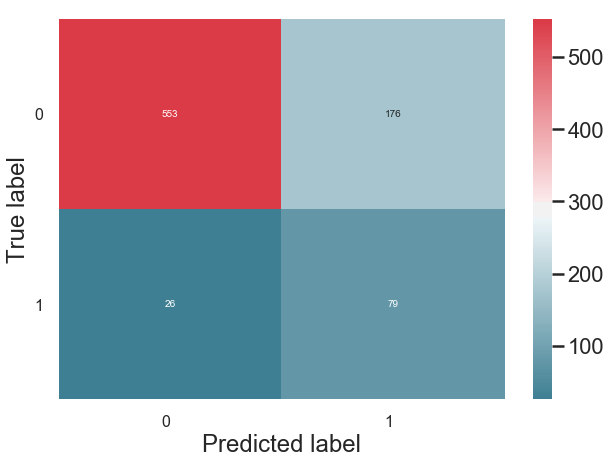

In [24]:
#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [25]:
#Predict the Probabilities
pred_prob_0 = logreg.predict_proba(X_test_sdf)[:,0]
pred_prob_1 = logreg.predict_proba(X_test_sdf)[:,1]

In [26]:
#Put all information on a DataFrame for analysis
df_results = X_test.copy()

df_results["Predicted_Class"] = y_pred
df_results["Predicted_Prob(0)"] = pred_prob_0
df_results["Predicted_Prob(1)"] = pred_prob_1

In [27]:
df_results.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes,Predicted_Class,Predicted_Prob(0),Predicted_Prob(1)
3047,88,0,172.8,81,29.38,193.4,90,16.44,89.6,107,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.816339,0.183661
3021,57,0,85.9,92,14.60,193.9,127,16.48,231.5,93,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.931150,0.068850
1671,84,0,130.2,105,22.13,278.0,60,23.63,305.4,74,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.729556,0.270444
1612,141,0,160.1,87,27.22,256.7,120,21.82,270.0,107,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.586461,0.413539
1428,96,0,200.6,117,34.10,289.5,120,24.61,98.3,95,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.095289,0.904711


### Customer Churn Analysis